In [1]:
import generate_topic_model as gen_model
from utils import *
from graphSVD import *
import gplsi

import matplotlib.pyplot as plt

import community as community_louvain  

import warnings
from scipy.sparse import SparseEfficiencyWarning

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=SparseEfficiencyWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)



k = 10 # latent dimension
m = 30 # sparsity parameter
N = 100  # doc length
n = 1000  # number of nodes
p = 600  # vocab size
r = 0.05  # heterogeneity parameter

coords_df = gen_model.generate_graph(N, n, p, k, r)
weights, edge_df = gen_model.generate_weights_edge(coords_df, k, 0.05)

W = gen_model.generate_W_strong(coords_df, N, n, p, k, r) 
random_matrix = np.random.randn(p-k, n)
orthogonal_component = random_matrix - (random_matrix @ W.T) @ W
orthogonal_matrix, _ = np.linalg.qr(orthogonal_component.T) 
orthogonal_matrix = orthogonal_matrix.T
U_truth = np.vstack((W, orthogonal_matrix)) # p x n
is_unitary = np.allclose(U_truth @ U_truth.T, np.eye(p), atol=1e-8)
print(is_unitary)

V1 = np.zeros((p, k))
V1[0:m, 0:k] = np.random.uniform(0, 1, (m, k))
V1_tilde = V1[0:m, 0:k]
V1_hat = V1_tilde @ sqrtm(inv(V1_tilde.T @ V1_tilde))
V1[0:m, 0:k] = V1_hat
V2 = np.random.uniform(0, 1, (p, p-k))
V2 = V2 - (V1 @ V1.T @ V2)
V2 = V2 @ sqrtm(inv(V2.T @ V2))
V_truth = np.hstack((V1, V2))
identity_check = V_truth.T @ V_truth
tolerance = 1e-10
if np.allclose(identity_check, np.eye(p), atol=tolerance):
    print("close to the identity matrix")

alpha = 1.0  
delta = 0.2
Lambda = np.diag([alpha]*k+[alpha - delta] * (p - k))

X = U_truth.T @ Lambda @ V_truth.T
X = X + np.random.normal(0, 0.02, X.shape)

True
close to the identity matrix


In [2]:
lamb_start=0.001
step_size=1.15
grid_len=29
eps=1e-04

start_time = time.time()
model_gplsi = gplsi.GpLSI_(
    lamb_start=lamb_start,
    step_size=step_size,
    grid_len=grid_len,
    eps=eps,
    fast_option=True,
    sparsity=True,
    initialize=True,
    verbose=1
)
model_gplsi.fit(X, N, k, edge_df, weights)
time_gplsi= time.time() - start_time
print(f"CV Lambda is {model_gplsi.lambd}")

Running graph aligned pLSI...
Initializing...


/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CS

Optimal lambda is 0.05006561206562252...
Optimal beta is 0.7461601544304668...
Error is 0.0051638200043988445


/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  f

Optimal lambda is 0.014231771646040076...
Optimal beta is 1.0819322239241767...
Error is 0.0020198826338719573


/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  f

Optimal lambda is 0.012375453605252242...
Optimal beta is 1.0819322239241767...
Error is 0.00048445130723814487


/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio

Optimal lambda is 0.012375453605252242...
Optimal beta is 1.0819322239241767...
Error is 0.00021070134082264085


/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  f

Optimal lambda is 0.014231771646040076...
Optimal beta is 1.0819322239241767...
Error is 0.00038910668085296977


/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/ssnal.py:345: RuntimeWarning: invalid value encountered in scalar divide
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]
/Users/jeong-yeojin/Dropbox/SpatialPCA/pycvxcluster/pycvxcluster/algos/admm.py:32: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  f

Optimal lambda is 0.014231771646040076...
Optimal beta is 1.0819322239241767...
Error is 3.1042551752891124e-11
Graph-aligned SVD ran for 6 steps.
CV Lambda is 0.014231771646040076


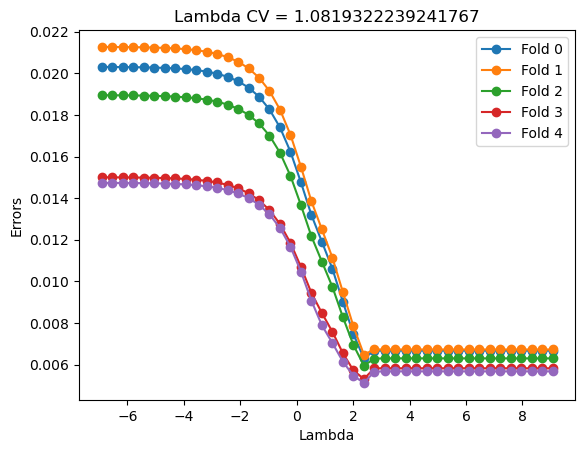

In [3]:
beta_grid = (lamb_start * np.power(step_size+0.3, 
                                   np.arange(grid_len+15))).tolist()  
plot_fold_cv(beta_grid, model_gplsi.beta_errs, model_gplsi.beta_cv, N)

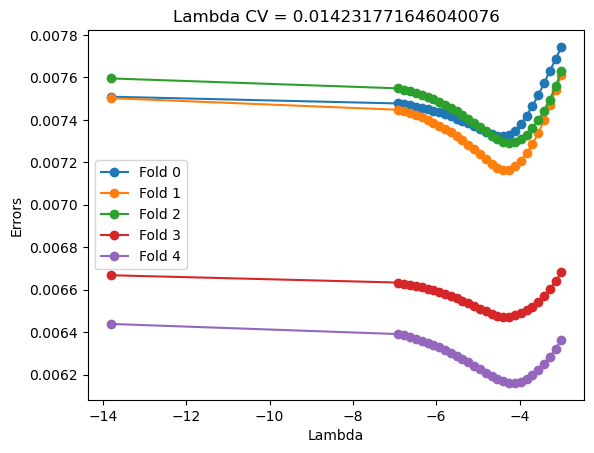

In [4]:
lambd_grid = (lamb_start * np.power(step_size, np.arange(grid_len))).tolist()
lambd_grid.insert(0, 1e-06)
plot_fold_cv(lambd_grid, model_gplsi.lambd_errs, model_gplsi.lambd, N)

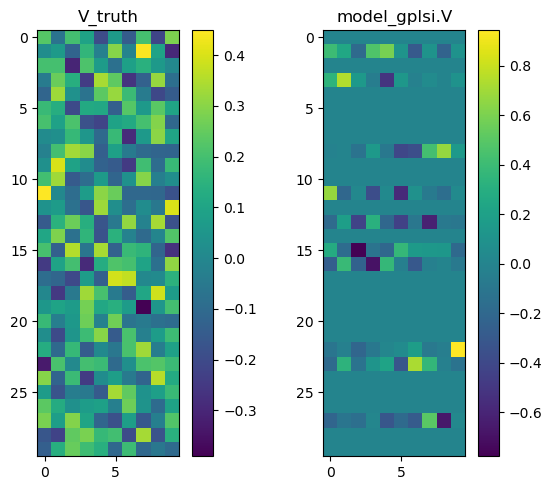

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(6, 5))

axes[0].imshow(V_truth[:m, :k], cmap='viridis', interpolation='nearest')
axes[0].set_title('V_truth')
plt.colorbar(axes[0].images[0], ax=axes[0])

axes[1].imshow(model_gplsi.V[:m, :k], cmap='viridis', interpolation='nearest')
axes[1].set_title('model_gplsi.V')
plt.colorbar(axes[1].images[0], ax=axes[1])

plt.tight_layout()
plt.show()

- try different m, N
- it seems like the sparsity regularization is too strong
- evaluate by l2 norm after aligning V_truth, U_truth and model_gplsi.V, model_gplsi.U by permmuting the columns(latent space)